In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("walkrun_clean.csv",index_col=0)

In [5]:
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,date_time
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994


#### From past observations we have seen that acceleration sensors are prominent in determining the walk and run class

#### Lets try Logistic regression using only acceleration_y since it is more efficient form our previous observations

In [6]:
X = np.array(df.acceleration_y)

In [7]:
y = np.array(df.activity)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#since its a sequential data lets not shuffle the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,shuffle=False)

In [10]:
X_train.shape

(70870,)

In [11]:
X_train = np.array(X_train)

In [12]:
X_train = X_train.reshape((70870,1))

In [13]:
y_train = np.array(y_train)

In [14]:
y_train = y_train.reshape((70870,1))

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression(max_iter=100)

In [17]:
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
X_test.shape

(17718,)

In [19]:
X_test = X_test.reshape((17718,1))

In [20]:
y_test = y_test.reshape((17718,1))

# Prediction and evaluation

In [22]:
y_predict = model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,accuracy_score

In [43]:
accuracy_score(y_test,y_predict)

0.901004628061858

In [66]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     10907
           1       0.82      0.96      0.88      6811

    accuracy                           0.90     17718
   macro avg       0.89      0.91      0.90     17718
weighted avg       0.91      0.90      0.90     17718



Text(0.5, 1.0, 'Using Logistic Regression')

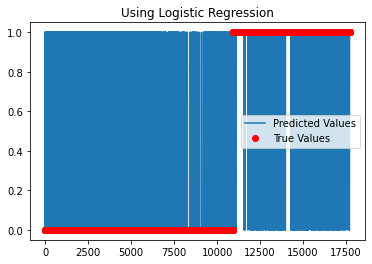

In [64]:
plt.plot(y_predict)

plt.plot(y_test,"ro")

plt.legend(['Predicted Values', 'True Values'])
plt.title("Using Logistic Regression")

## Observations: 
    *  Logistic Regresion with only one feature ( acceleration_y ) is giving us an accuracy of 90% with good precision and recall
    * Though the accuracy is more but still the prediction vary more since no sequential info is stored

In [74]:
# Now lets try using SVM with all accelerometrics sensors to check whether it may help us better

In [31]:
X_new = df.iloc[:,[1,2,3]]

In [32]:
X_new.head()

,acceleration_x,acceleration_y,acceleration_z
0,0.2650,-0.7814,-0.0076
1,0.6722,-1.1233,-0.2344
2,0.4399,-1.4817,0.0722
3,0.3031,-0.8125,0.0888
4,0.4814,-0.9312,0.0359


In [33]:
y_new = df.activity

In [34]:
y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

In [35]:
#since its a sequential data lets not shuffle the data
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new,y_new,test_size=0.2,random_state=2,shuffle=False)

In [36]:
## svm classifier for classification

In [37]:
from sklearn.svm import SVC

In [38]:
model_new = SVC(C=0.1, gamma=1, kernel="rbf")

In [39]:
model_new.fit(X_train_new,y_train_new)

SVC(C=0.1, gamma=1)

# Prediction and evaluation

In [40]:
y_predictions = model_new.predict(X_test_new)

In [44]:
accuracy_score(y_test_new,y_predictions)

0.9835195846032283

In [45]:
print(classification_report(y_test_new,y_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10907
           1       0.97      0.99      0.98      6811

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718



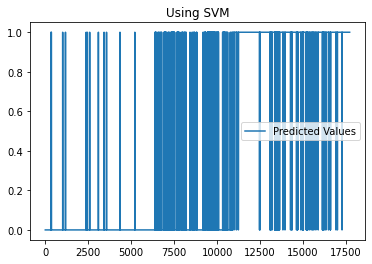

In [60]:
plt.plot(y_predictions)
plt.title("Using SVM")
plt.legend(['Predicted Values'])

## Observations: 
    *  SVM  is giving us an accuracy of 98% with excellent precision and recall of 98% 
    * But still there is huge variance in each prediction 

## Though general models are working  well on this data but sequential information is NOT preserved in this models.


### So the models are varying after every certain number of prediction 

Lets try using LSTM to see how accurate the predictions are